<a href="https://colab.research.google.com/github/AbhishekRP2002/AbhisX12/blob/main/Dropout_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import cv2
 import matplotlib.pyplot as plt 
 import pandas as pd

<function matplotlib.pyplot.show>

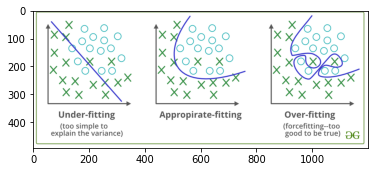

In [ ]:
img = cv2.imread("/content/overfitting_2.png")
plt.imshow(img)
plt.show

 **Binary classification problem** 

In [ ]:
url = 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/13_dropout_layer/sonar_dataset.csv'
df = pd.read_csv(url, header = None)

In [ ]:
df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
df.shape


(207, 61)

In [ ]:
df.sample (10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,R
44,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
22,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075,0.1882,...,0.0173,0.0149,0.0115,0.0202,0.0139,0.0029,0.0160,0.0106,0.0134,R
122,0.0249,0.0119,0.0277,0.0760,0.1218,0.1538,0.1192,0.1229,0.2119,0.2531,...,0.0027,0.0068,0.0150,0.0012,0.0133,0.0048,0.0244,0.0077,0.0074,M
113,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079,M
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018,M
189,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M


In [ ]:
df.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [ ]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
X =df.drop(60, axis ='columns')
y = df[60]
y


0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

We need to do one hot encoding and convert the R and M into binary digits  

In [ ]:
 y = pd.get_dummies(y , drop_first= True)
 y.sample(10) #R -->1 AND M ---> 0  1 for R means it is a rock and 0 means it is a Mineral 


,R
195,0
186,0
199,0
51,1
82,1
203,0
46,1
22,1
35,1
10,1


In [ ]:
import sklearn

In [ ]:
#divide ur data into train and test data set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.25, random_state =1)

In [ ]:
X_train.shape , X_test.shape

((156, 60), (52, 60))

In [ ]:
#BUilding the ANN model using keras 
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Dense(60, input_dim =60, activation = 'relu'),  
        keras.layers.Dense(20, input_dim =60, activation = 'relu'),  
        keras.layers.Dense(1, input_dim =60, activation = 'sigmoid')                  
])

model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train , y_train, epochs =100 , batch_size =10) #using mini batch gradient descent 


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6774 - accuracy: 0.5385
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6090
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6859
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6795
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.6987
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6795
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7308
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8333
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7564
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8269
Epoch 11/

In [ ]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6011 - accuracy: 0.7885


[0.6010700464248657, 0.7884615659713745]

**The accuracy of the model is defined to be 1 but on evaluating with test data it predicted 78% correct**

In [ ]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

[4.18032357e-07 8.81574512e-01 9.92333412e-01 1.75833702e-04
 9.99995828e-01 9.92182374e-01 1.14702344e-01 9.99999642e-01
 1.87461101e-05 9.99999404e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.85      0.68      0.76        25

    accuracy                           0.79        52
   macro avg       0.80      0.78      0.78        52
weighted avg       0.80      0.79      0.79        52



In [ ]:
#Introducing Dropout layer
model = keras.Sequential([
        keras.layers.Dense(60, input_dim =60, activation = 'relu'),
        keras.layers.Dropout(0.4),  
        keras.layers.Dense(20, input_dim =60, activation = 'relu'),
        keras.layers.Dropout(0.5),    
        keras.layers.Dense(1, input_dim =60, activation = 'sigmoid')                  
])

model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train , y_train, epochs =100 , batch_size =10)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7089 - accuracy: 0.5064
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6218
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.6026
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5705
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5641
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5962
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5769
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5962
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6282
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6218
Epoch 11/

In [ ]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.7692


[0.4465653598308563, 0.7692307829856873]